# Image Coutouring

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

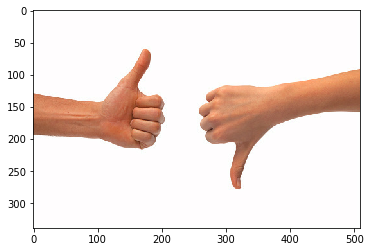

In [9]:
image = cv2.imread('images/two_hands.jpg')

image_copy = np.copy(image)

image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

## Produce a binary image for finding contours

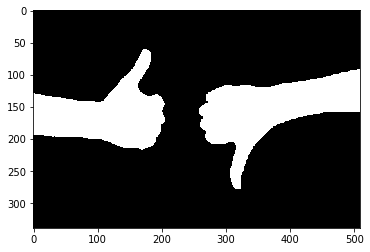

In [10]:
gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)

retval, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)

plt.imshow(binary, cmap='gray')

## Find and draw the contours

* Explore the OpenCV [documentation](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_table_of_contents_contours/py_table_of_contents_contours.html) to learn all about the information that contour detection provides!

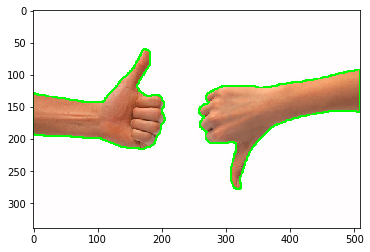

In [12]:
# This findContours function is to find contours from thresholded image. It takes in
#   1. binary image
#   2. contour retrieval mode, which we will have as a tree
#   3. contour approximation method
# It outputs:
#   a list of contours
#   a hierarchy, which is useful if you have many contours nested within one another. 
#      The hierarchy defines their relationship to one and another 
retval, contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

image_copy2 = np.copy(image_copy)

# This drawContours function is to draw all contours on an image. It takes in
#   1. an image
#   2. a list of contours
#   3. an integer indicating which contours to display, -1 indicates displaying all contours
#   4. the color of displaying contours
#   5. the size of contours
all_contours = cv2.drawContours(image_copy2, contours, -1, (0,255,0), 2)

plt.imshow(all_contours)

## Select a single contour

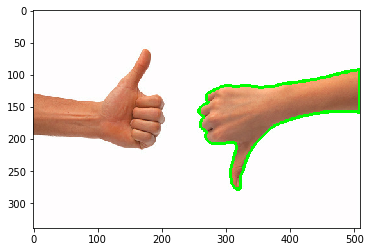

In [15]:
selected_contour = contours[0]

image_copy3 = np.copy(image_copy)

contour_image = cv2.drawContours(image_copy3, [selected_contour], 0, (0, 255, 0), 3)

plt.imshow(contour_image)

## Contour Features

Every contour has a number of features that you can calculate, including the area of the contour, it's orientation (the direction that most of the contour is pointing in), it's perimeter, and many other properties outlined in [OpenCV documentation](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_properties/py_contour_properties.html).

In this quiz, you'll be asked to identify the orientations of both the left and right hand contours. The orientation should give you an idea of which hand has its thumb up and which one has its thumb down!

**Orientation**

The orientation of an object is the angle at which an object is directed. To find the angle of a contour, you should first find an ellipse that fits this contour and then extract the `angle` from that shape.

```python
# Fit an ellipse to a contour and extract the angle from that ellipse. 
# This function also gives the Major Axis and Minor Axis lengths.
(x,y), (MA,ma), angle = cv2.fitEllipse(selected_contour)
```

In [19]:
def orientations(contours):
    
    angles = []
    for contour in contours:
        (x, y), (MA, ma), angle = cv2.fitEllipse(contour)
        angles.append(angle)
    return angles

In [20]:
# Print out the orientation values
angles = orientations(contours)
print('Angles of each contour (in degrees): ' + str(angles))

Angles of each contour (in degrees): [61.35833740234375, 82.27550506591797]


**Orientation values**

These orientation values are in degrees measured from the x-axis. A value of zero means a flat line, and a value of 90 means that a contour is pointing straight up!

So, the orientation angles that you calculated for each contour should be able to tell us something about the general position of the hand. The hand with it's thumb up, should have a higher (closer to 90 degrees) orientation than the hand with it's thumb down.

Using this knowledge, your next task will be to focus only on the left hand. Keep scrolling!

## Bounding Rectangle

In the next task, you'll be asked to find the bounding rectangle around the left hand contour, which has its thumb up, and use a bounding rectangle to crop the image and better focus on that one hand!

```python
# Find the bounding rectangle of a selected contour
x,y,w,h = cv2.boundingRect(selected_contour)

# Draw the bounding rectangle as a purple box
box_image = cv2.rectangle(contour_image, (x,y), (x+w,y+h), (200,0,200),2)
```
To crop the image, select the correct width and height of the image to include.

```python
# Crop using the dimensions of the bounding rectangle (x, y, w, h)
cropped_image = image[y: y + h, x: x + w]
```

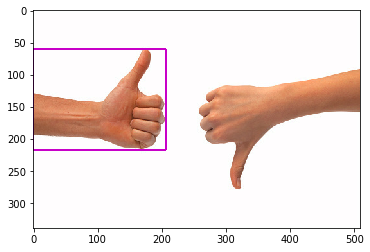

In [22]:
selected_contour = contours[1]

image_copy4 = np.copy(image_copy)

x, y, w, h = cv2.boundingRect(selected_contour)

box_image = cv2.rectangle(image_copy4, (x,y), (x+w, y+h), (200,0,200), 2)

plt.imshow(box_image)

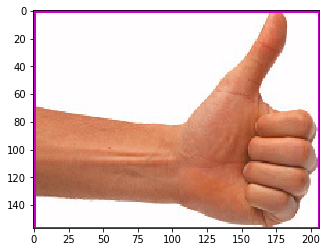

In [23]:
cropped_image = box_image[y: y + h, x: x + w]

plt.imshow(cropped_image)

Text(0.5,1,'Cropped Image')

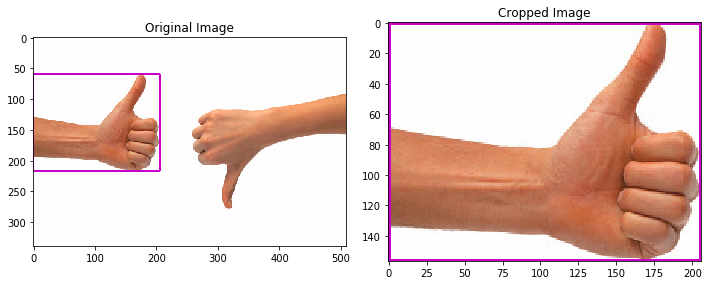

In [24]:
# Display the cropped image side-by-side with the original
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
f.tight_layout()
ax1.imshow(box_image)
ax1.set_title('Original Image')
ax2.imshow(cropped_image)
ax2.set_title('Cropped Image')